## Prediksi lama kerja seseorang dan gajinya.
menggunakan teknik GridSearch

In [1]:
import pandas as pd
 
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [2]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
import numpy as np
 
# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']
 
# mengubah bentuk atribut
X = np.array(X)
X = X.reshape(-1,1)

### implementasi GridSearch
Mencari parameter terbaik

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
 
# membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(model, parameters)
 
# melatih model dengan fungsi fit
grid_search.fit(X,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [6]:
# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [7]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

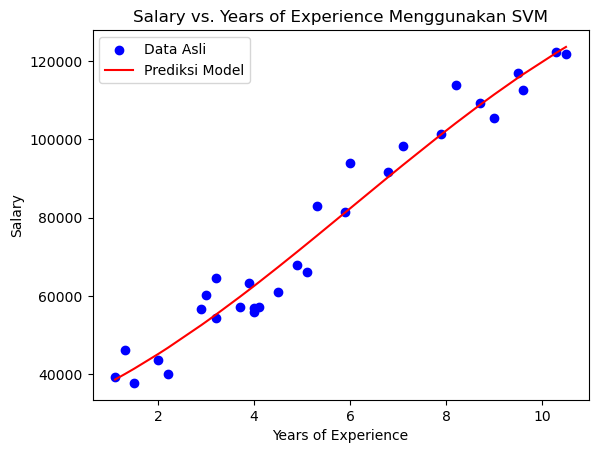

In [12]:
# Plot
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model_baru.predict(X), color='red', label='Prediksi Model')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience Menggunakan SVM')
plt.legend()
plt.show()

Visualisasi Data:
Scatter plot menunjukkan data asli, dengan YearsExperience pada sumbu x dan Salary pada sumbu y. Data ini menunjukkan bahwa secara umum, gaji meningkat seiring dengan bertambahnya pengalaman kerja, tetapi ada beberapa variabilitas.